# FINAL NOTEBOOK

## INTRODUCTION

Pittsburgh has tons or different neighbourhoods. Each varies in different aspects, hae their own pros and cons. Thus instead of comparing on various datasets, we tried to scale the walkability of neighbourhoods. We belive that a nice neightbourhood should feel nice even without a car. A simple safe place where one can walk around eaily and access various spots without needing public transport or face traffic hellscape. We decomposed walkability into 3 metrics which we analysed and each of them contributed to the final conclusion in varying degrees. First metric was AQI to represent how healthy it is to walk around,  traffic volume to represent how pleasant or calm it is walking, and arrest to present general safety of the neightbourhood. This notebook goes through the metrics, explains how each of these interplay, and codes we used to analyse. 

## METRICS

### 1. TRAFFIC

Why Traffic?
We all hate traffic. It’s one thing getting up, getting ready and walking directly to class or work in the morning, it’s another when you have to drive there in heavy traffic, or deal with the sound of a busy roadway while trying to sleep. 


The WPDRC has a specific traffic count dataset, which consists of average counts of cars over a set couple of days in a neighborhood since 2019, alongside a bunch of other data. 
To simply put how this rating method works, we take all of the average car counts for a neighborhood, add them all together, and divide by the number of times the neighborhood appeared in the data set. Whichever neighborhood has the lowest average of daily car count averages wins. 
Note: Most recent accessible data is from 2021, the WPDRC is working on getting more recent data.


#### The code:

In [6]:
import pandas as pd
PittTC = pd.read_csv("City of Pittsburgh Traffic Count.csv", index_col = "_id")

FileNotFoundError: [Errno 2] No such file or directory: 'City of Pittsburgh Traffic Count.csv'

In [5]:
import math #This is for the isnan operator to assign a default value of zero for the sections of the database that are left blank
NameDict = dict() # Stores how many times a specific neighborhood appears in the database
TrafficDict = dict() # Stores the total amount of the average_cars_per_day variable (if it exists)
AvgTraffic = dict() # For each TrafficDict value that is not zero, we divide it by NameDict and store that value here (essentially storing the averages)
for index, row in PittTC.iterrows():
    Neighborhood = row["neighborhood"]
    carTraffic = row["average_daily_car_traffic"]
    if Neighborhood not in NameDict:
        NameDict[Neighborhood] = 1
    else:
        NameDict[Neighborhood] = NameDict[Neighborhood] +1
    if Neighborhood not in TrafficDict:
        if math.isnan(carTraffic): #Check if there's a number in this row
            TrafficDict[Neighborhood] = 0 #If there is a null (or NaN as it's called in python) in the database, set it to a value of zero
        else:
            TrafficDict[Neighborhood] = carTraffic #If there is, set the value of TrafficDict to it
    else:
        if math.isnan(carTraffic): #Check if the row index we are adding actually exists and is not left blank
            TrafficDict[Neighborhood] = TrafficDict[Neighborhood] + 0 #Since we're not able to add NaN (null) values to our running counter without it breaking, we add zero to the counter instead
        else:
            TrafficDict[Neighborhood] = TrafficDict[Neighborhood] + carTraffic
    if TrafficDict[Neighborhood] != 0: #This if block makes sure that only the neighborhoods with viable data to analyse is outputted (else we have a bunch of neighborhoods that are zero or NAN)
        AvgTraffic[Neighborhood] = TrafficDict[Neighborhood] / NameDict[Neighborhood]
        
#print(NameDict)
#print(TrafficDict)
AvgTraffic = dict(sorted(AvgTraffic.items(), key = lambda item: item[1]))
print(AvgTraffic)

import matplotlib.pyplot as plt

# Convert dictionary to lists
neighborhoods = list(AvgTraffic.keys())
traffic_vals = list(AvgTraffic.values())

plt.figure(figsize=(12,6))
plt.bar(neighborhoods, traffic_vals)
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Average Daily Traffic")
plt.title("Average Traffic by Neighborhood")
plt.tight_layout()
plt.show()


NameError: name 'PittTC' is not defined

OUTPUT AND CONCLUSION:
According to the Code:
1st place: South Side Flats
2nd place: Lincoln-Lemington-Belmar
3rd place: Lincoln Place

Dead Last: Regent Square


### 2. ARRESTS

Why Arrests?
Everyone wants to feel safe in their neighborhood. While it may not always be the best indicator, we decided to use arrests as a metric for safety where the places with the most arrests were the safest because the most people were getting caught.


The WPDRC has a specific arrest count dataset, which consists of arrests that happened in different neighborhoods around the area. Some of the other data the dataset includes is race, incident location, the offense, and more. 
The rating we gave for each neighborhood simply comes from taking all the arrest from the dataset and grouping them by neighborhood. The neighborhoods with the most arrests got ranked highest because we assume that means the police are catching all the crime. 



#### The code: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

police = pd.read_csv('PoliceData.csv')

arrest_counts = police["INCIDENTNEIGHBORHOOD"].value_counts()
arrest_counts.plot(kind="bar", figsize=(20,10))

plt.title("Number of Arrests by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Arrests")

plt.show()

According to the Code:
1st place: Central Business district
2nd place: South Side Flats
3rd place: Carrick

Dead Last: Mt. Oliver neighborhood


### 3. AQI 

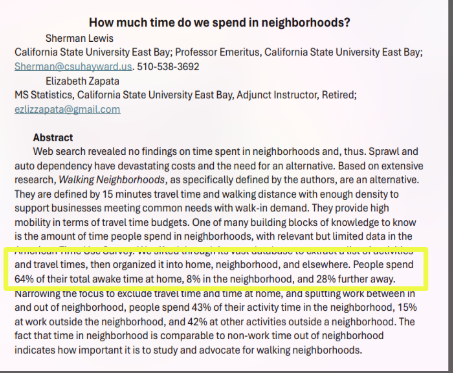

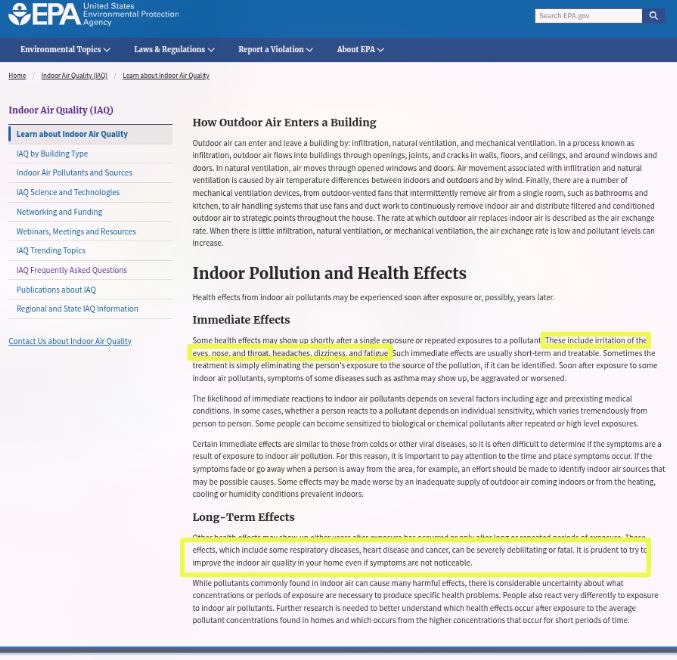

AQI affects how comfortably we can walk, perform physical activity, and our overall health. Researhc indicates we perform about and over 60% of our daily acitivities within our neightbourhood. People in neighbourhood are contantly exposed to conditions of the neighbourgood. EPA claims aqi can have short term eggects like irritation of nose, eye, and headaches, nausea, and fatigue. Over a long timespan, side effects such as respiraory diseases etc show up and therefore its recommended to try to improve AQI even if it doesn’t show symptoms. 

The dataset records daily air quality readings from monitoring sites across Allegheny County.


Each entry includes the site name, pollutant type, AQI value (0–500), and a qualitative description like “Good” or “Moderate.”


It captures data from multiple years to show how air quality varies by location and pollutant over time.
Used: site, date, and index_value to calculate each neighborhood’s average AQI.


Used: description to confirm readings corresponded to overall air quality levels.


Didn’t use: parameter, since we focused on overall AQI, not individual pollutants.


Didn’t use: health_advisory and health_effects, as most entries were blank.


Final metric: converted average AQI (0–500) into a Clean Air Score (0–100) to compare neighborhoods.



Air Quality Index (AQI) → measures air pollution levels (lower = better).

PM₂.₅ (Fine Particulate Matter) – tiny particles <2.5 μm, come from smoke, cars, industry; most dangerous since they go deep into lungs.


PM₁₀ (Coarse Particulate Matter) – dust, pollen, mold, etc.


O₃ (Ozone) – forms when sunlight reacts with vehicle + industrial emissions; bad for lungs.


NO₂ (Nitrogen Dioxide) – mainly from traffic and combustion; irritates airways.


SO₂ (Sulfur Dioxide) – from burning coal or oil; causes acid rain.


CO (Carbon Monoxide) – from incomplete fuel burning; reduces oxygen in blood.



BASED ON ALL THESE PARAMETERS: air_score = 100 * (1 - (AQI / 500))




AQI (Air Quality Index) naturally ranges from 0 → 500


AQI / 500 gives a fraction (how close it is to the worst possible value)


subtracting from 1 inverts it — so lower AQI = higher score


multiplying by 100 scales it to a clean 0–100 range



#### THE CODE:

In [ ]:
#AQI ANALYSIS
#AUTHOR: AMARTYA CHAKRABORTY

#GOAL:
#assign each neighbourhood a score from 1 to 100 based on aqi index and then figure out the best neighbourhood

#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

# loading the dataset
try:
    df = pd.read_csv(datasets/AQI_dataset_amartya.csv)
except:
    df = pd.read_csv("/ihome/cmpinf0010_2025f/amc725/Big-Ideas-in-CS-Final-Project/datasets/AQI_dataset_amartya.csv")

#Removing unrequired columns
df = df[["date", "site", "parameter", "index_value", "description"]]

#calculating the daily average aqi for each site
avg_aqi = df.groupby("site")["index_value"].mean().reset_index()

#scaling the aqi
#AQI is between 0-500. therefore first we calculate the fraction of aqi by dividing aqi by 500. 
#since higher scores are worse and lower scores are better, we substract from 1 to fix this issue
#lastly we convert to percentage between 1-100 by converting to pencentage
avg_aqi["air_score"] = (100 * (1 - avg_aqi["index_value"] / 500))

#finally we rank them one by one
rank = avg_aqi.sort_values(by="air_score")
print(rank)

# VISUALISATION USING MATPLOTLIB
#drawing the bar graph
plt.bar(rank["site"], rank["air_score"])
#labelling the axis
plt.xlabel("Neighborhood")
plt.ylabel("Air quality Score (0–100)")
#adding a title
plt.title("Air Quality Score by Neighborhood")
#the names of neighbourhood overlap horizonatally. fixing it by making them vertical
plt.xticks(rotation=90)
#showing the graph
plt.show()

# PRINTING THE CONCLUSION
best_neighbourhood = rank.iloc[-1]["site"]
best_score = rank.iloc[-1]["air_score"]
print("Best Neighborhood:",best_neighbourhood,"with score:",best_score)

CONCLUSION: 
Most Pittsburgh neighborhoods have pretty clean air, with scores above 90.
A few areas still show signs of higher pollution levels.
Lawrenceville 2 has the cleanest air overall, almost perfect.
The results show that while air quality is good, some spots still need attention.

## OVERALL CONCLUSION:
South side flats is the best neighbourhood in pittsburgh. It consistently appears on top of all the lists and graphs we prepares. And the site which is nearing top in AQI index is also near this region.

conclusion derived from traffic dataset:
1st place: South Side Flats
2nd place: Lincoln-Lemington-Belmar
3rd place: Lincoln Place

Dead Last: Regent Square

conclusion derived from arrests dataset:
1st place: Central Business district
2nd place: South Side Flats
3rd place: Carrick

Dead Last: Mt. Oliver neighborhood

conclusion from the aqi dataset:
Most Pittsburgh neighborhoods have pretty clean air, with scores above 90.
A few areas still show signs of higher pollution levels.
Lawrenceville 2 has the cleanest air overall, almost perfect.
The results show that while air quality is good, some spots still need attention.